## Imports
** Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline 
(You'll import sklearn as you need it.)**

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

** Read in the Ecommerce Customers csv file as a DataFrame called customers.**

In [7]:
df=pd.read_csv('Ecommerce Customers')

**Check the head of customers, and check out its info() and describe() methods.**

In [9]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [10]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Exploratory Data Analysis

**Let's explore the data!**

For the rest of the exercise we'll only be using the numerical data of the csv file.
___
**Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?**

In [13]:
sns.jointplot(df,x='Time on Website', y='Yearly Amount Spent')

** Do the same but with the Time on App column instead. **

In [15]:
sns.jointplot(df,x='Time on App', y='Yearly Amount Spent')

** Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

In [17]:
sns.jointplot(df,x='Time on Website', y='Length of Membership', kind='hex')

**Let's explore these types of relationships across the entire data set. Use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below.(Don't worry about the the colors)**

In [19]:
sns.pairplot(df)

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

**Create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership. **

In [22]:
sns.lmplot(df, x='Yearly Amount Spent',y='Length of Membership')

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [24]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [25]:
X=df.drop(columns=['Email', 'Address', 'Avatar', 'Yearly Amount Spent'])
X

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308
...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573
496,34.702529,11.695736,37.190268,3.576526
497,32.646777,11.499409,38.332576,4.958264
498,33.322501,12.391423,36.840086,2.336485


** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,df['Yearly Amount Spent'], test_size=0.2, random_state=101)

## Training the Model

Now its time to train our model on our training data!

** Import LinearRegression from sklearn.linear_model **

In [30]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lm.**

In [32]:
lmodel=LinearRegression()

** Train/fit lm on the training data.**

In [34]:
lmodel.fit(X_train,y_train)

LinearRegression()

**Print out the coefficients of the model**

In [36]:
lmodel.coef_

array([26.02948861, 38.70983485,  0.35618404, 61.47280903])

## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**

In [38]:
Predicted_y=lmodel.predict(X_test)
print(Predicted_y)
print(y_test)

[456.61303865 402.86759325 409.28303802 591.87744119 590.45805085
 549.10328198 577.73384983 716.29274839 473.55196468 546.27189564
 337.47672426 500.45263167 553.46927122 409.22125099 766.41897076
 545.97637593 693.77658658 507.49943222 573.37979139 573.54521438
 397.39798193 555.16201736 458.35507403 482.70625714 559.39495907
 412.85811054 532.44048262 377.57887943 535.15243506 448.1195441
 595.96723677 667.74018422 512.04948273 573.31053385 505.25234611
 565.79901328 460.10382733 449.57153219 422.58816837 456.63420235
 598.25072639 449.97454297 616.00787846 511.86572049 504.33762368
 515.93194394 568.51808328 551.99040739 356.00451872 464.81658973
 481.68495717 534.42876633 255.4664104  505.42655585 520.26978457
 314.39963628 502.43586487 387.00034009 473.20092986 432.5830045
 540.17031187 590.20394016 753.18615752 558.54589078 523.91731773
 431.73531287 425.36600205 519.11525112 642.26692462 481.93296399
 549.83578854 380.71249503 555.67145005 403.15764749 472.71297167
 501.9718373

** Create a scatterplot of the real test values versus the predicted values. **

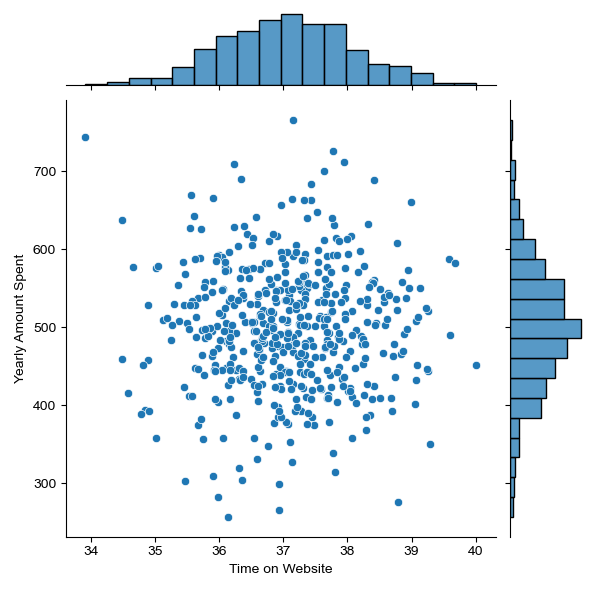

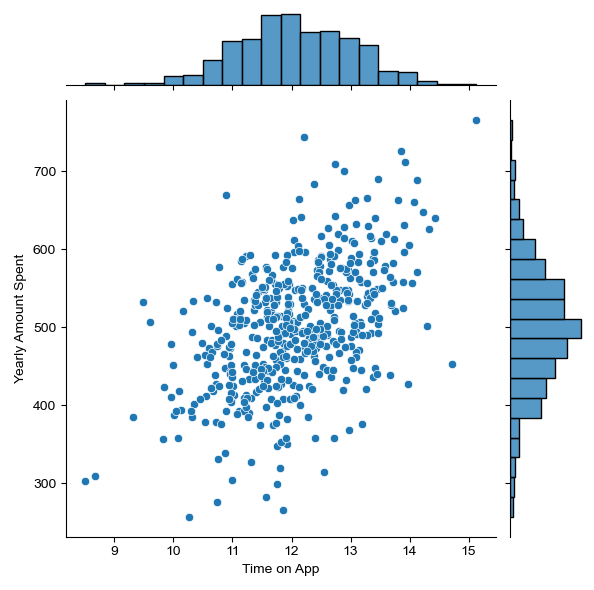

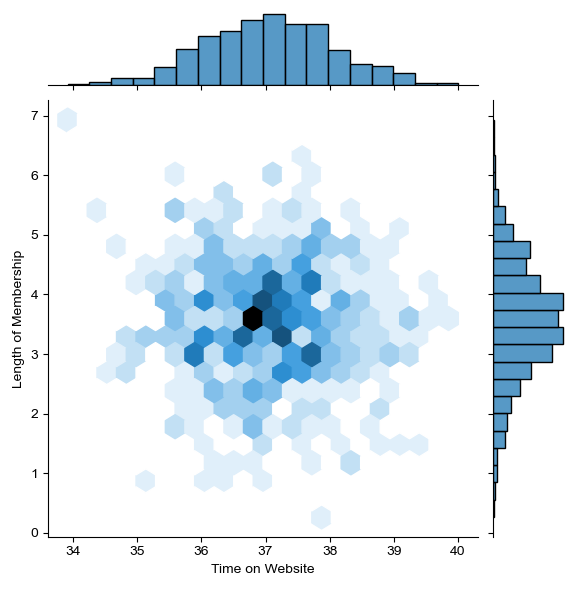

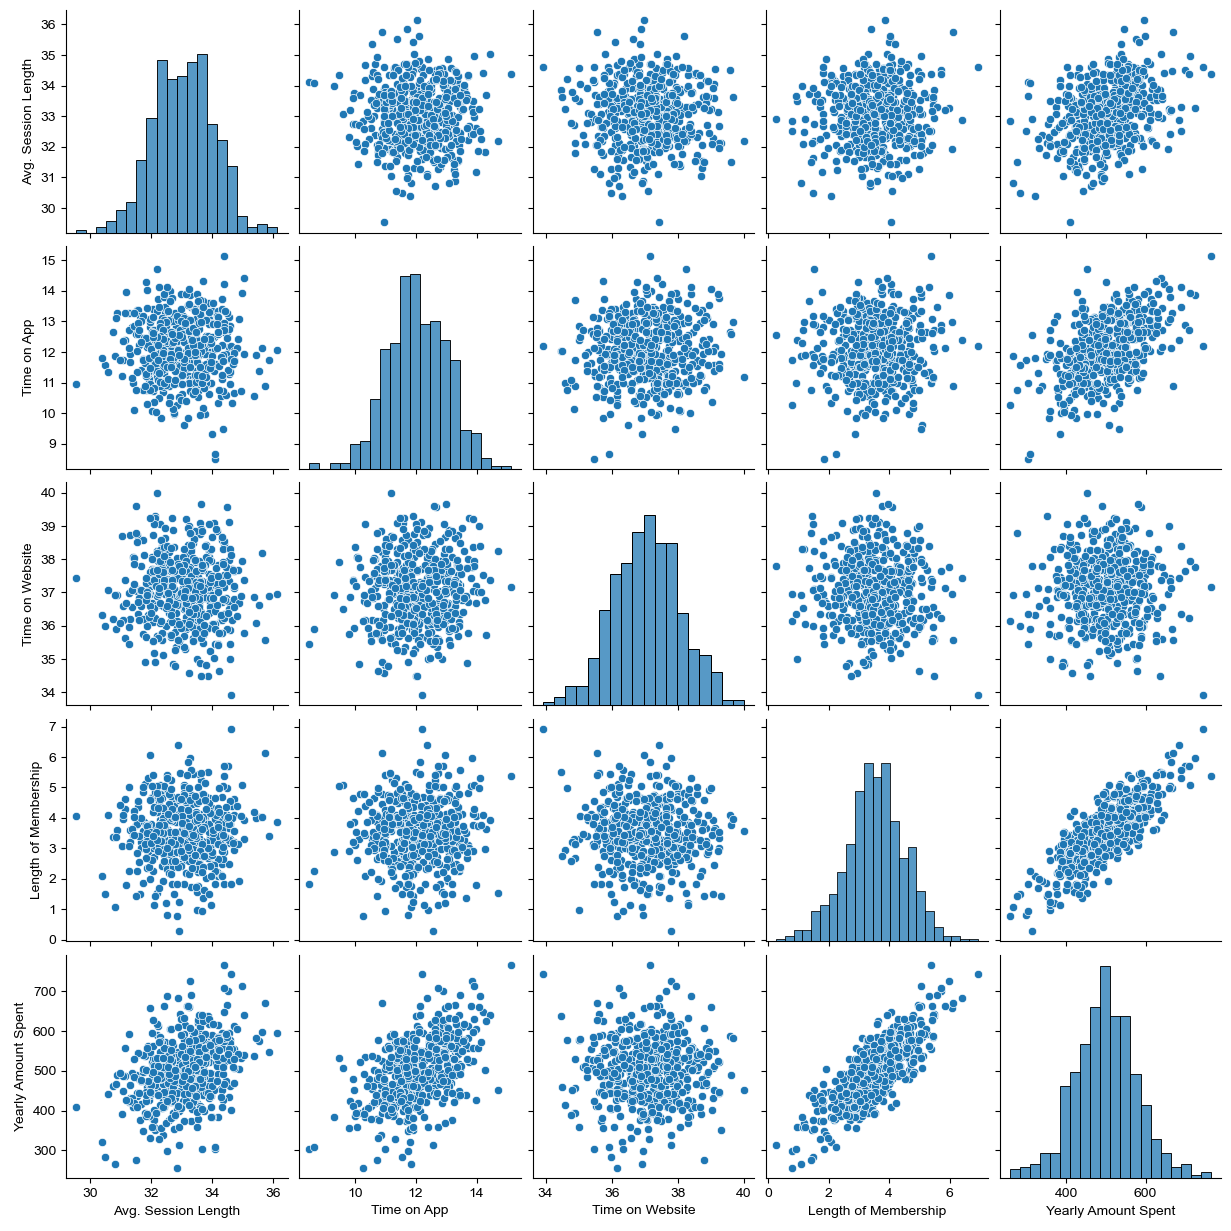

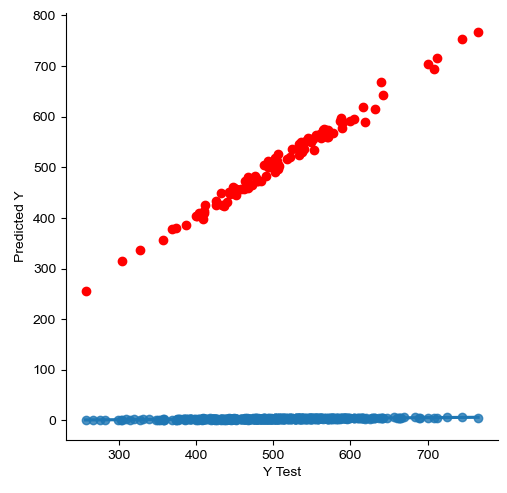

In [40]:
sns.set_style('whitegrid')
plt.scatter(x=y_test,y=Predicted_y,c='r')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [42]:
from sklearn import metrics

In [43]:
print('MAE:', metrics.mean_absolute_error(y_test, Predicted_y))
print('MSE:', metrics.mean_squared_error(y_test, Predicted_y))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, Predicted_y)))

MAE: 7.758907540457854
MSE: 91.82335857016923
RMSE: 9.582450551407465


## Residuals

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

In [45]:
sns.distplot(Predicted_y-y_test,bins=60)

C:\Users\suven\AppData\Local\Temp\ipykernel_17040\891256607.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Predicted_y-y_test,bins=60)


<Axes: xlabel='Yearly Amount Spent', ylabel='Density'>

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

** Recreate the dataframe below. **

In [47]:
df2=pd.DataFrame(lmodel.coef_,index=['Avg. Session Length','Time on App','Time on Website','Length of Membership'],columns=['Coeffecient'])
df2

,Coeffecient
Avg. Session Length,26.029489
Time on App,38.709835
Time on Website,0.356184
Length of Membership,61.472809


In [48]:
from sklearn.metrics import r2_score


Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares


In [50]:
score=r2_score(y_test,Predicted_y)
print(score)

0.9881661299145553


**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [52]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.9876678617004313

In [53]:
data=X.iloc[0,:].values
print(data)
Predicted=lmodel.predict(data.reshape(1,-1))
Predicted

[34.49726773 12.65565115 39.57766802  4.08262063]


C:\Users\suven\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([595.21192116])

In [54]:
df

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


##Pickling the model for deployment

In [56]:
import pickle

In [57]:
pickle.dump(lmodel,open('regmodel.pkl','wb',))

In [58]:
pickle_model=pickle.load(open('regmodel.pkl','rb',))

In [59]:
df.head(1)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054


In [79]:
data=X.head(1)
#data=np.array(["mstephenson@fernandez.com",	"835","Frank Tunnel 82180-9605"	,"Violet","34.497268",	"12.655651",	"39.577668",	"4.082621"	])
#data=data.reshape(1,-1)
pickle_model.predict(data)

array([595.21192116])

In [ ]:
print(X.head(1))
df['Yearly Amount Spent'][0]
